In this project,we will train a model on a dataset which contains 1.6 million tweets extracted from twitter along with the kind of sentiment they convey so that we can predict on a given random tweet the kind of sentiment it conveys(positive,negative or neutral).The name of dataset is Sentiment140 and it was obtained from Kaggle.Nowadays,many people use Twitter as a platform to talk about issues;be it political issues,economic issues,entertainment,technology and the list goes on. With the help of sentiment analysis we can do variety of things some of which are: 1.Judge whether a movie is good or not by knowing the sentiments of the tweets that mention them. 2.Get the opinion of public on some important political issue 3.Help curb the spread of hate speech. So with that lets start the project by reading the data.

# Reading and understanding the data

In [ ]:
!pip install transformers
!pip install keras tf-models-official pydot graphviz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('../input/Twitter_Sentiment_Data.csv',encoding='cp437',header=None)
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
data.columns=['Sentiment','id','Date_of_posting','flag','username','tweet']
data.head()

,Sentiment,id,Date_of_posting,flag,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
data['Sentiment'][17]

0

In [ ]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Sentiment        1600000 non-null  int64 
 1   id               1600000 non-null  int64 
 2   Date_of_posting  1600000 non-null  object
 3   flag             1600000 non-null  object
 4   username         1600000 non-null  object
 5   tweet            1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


Sentiment          0
id                 0
Date_of_posting    0
flag               0
username           0
tweet              0
dtype: int64

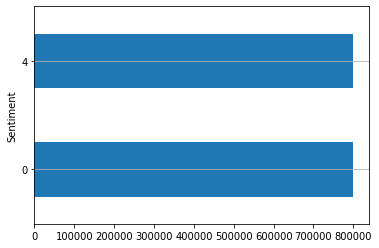

In [ ]:
fig,ax=plt.subplots()
data['Sentiment'].reset_index().groupby('Sentiment').count().sort_values(by='index').plot(kind='barh',legend=False,ax=ax).grid(axis='y')

The sentiment column is the target column and has two labels(0 and 4). 0 indicates negative sentiment, 4 indicates positive sentiment. The data does not contain any null values and there is no class imbalance. Lets proceed with text pre-processing. We will be using spacy library for processing the text data.

# Cleaning and pre-processing text data

In [ ]:
import re
import string

def clean_text(text):
    text = text.split()
    
    text = " ".join(text)
    
    text = re.sub(f'[{re.escape(string.punctuation)}]','',text)
    
    return text

In [ ]:
import spacy
nlp = spacy.load("en_core_web_md",exclude=['parser','ner'])

In [ ]:
nlp.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False}},
 'problems': {'tok2vec': [],
  'tagger': [],
  'attribute_ruler': [],
  'lemmatizer': []},
 'attrs': {'doc.tensor': {'assigns': ['tok2vec'], 'requires': []},
  'token.lemma': {'assigns': ['lemmatizer'], 'requires': []},
  'token.tag': {'assigns': ['tagger'], 'requires': []}}}

In [ ]:
import re

In [ ]:
def cleaner(text):
    text=text.lower()
    cleaned=re.sub('@[\S]+','',text)# @ username -> ''
    cleaned=re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',cleaned)#URLs
    cleaned = re.sub(r'#([\S]+)', r'\1', cleaned)#removing hash tags i.e #topic -> topic
    #cleaned=re.sub(r'[^a-zA-Z]',' ',cleaned)
    cleaned = cleaned.split()
    cleaned = " ".join(cleaned)
    #clean=re.sub(r'\s{2}|\s{3}|\s{4}|\s{5}',' ',to_string)
    #clean=re.sub(r'\s\w\s',' ',clean)
    #clean=re.sub(r'\s(ve)\s|\s(nd)\s|\s(st)\s|\s(th)\s|\s(rd)\s','',clean)
    return cleaned

In [ ]:
cleaned = cleaner(data['tweet'][0])
cleaned

"- awww, that's a bummer. you shoulda got david carr of third day to do it. ;d"

In [ ]:
# Import nltk package and download the stopwords
import nltk 
nltk.download('stopwords')
# We filter out the english language stopwrds
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Chaitanya
[nltk_data]     Ashtekar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
custom_stopwords = ["'s","shoulda","'t","n't","'ve"]
for sw in custom_stopwords:
    stop_words.add(sw)

In [ ]:
def tokenizer(doc,stop_words):
    tokens=[token.lemma_ for token in doc if token.text not in stop_words and token.is_punct==False]
    text=" ".join(tokens)
    return text

In [ ]:
data = data.drop(columns=['Date_of_posting','id','flag','username'])

In [ ]:
data.head()

,Sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


There is no class imbalance in this dataset. So we will use normal accuracy as a metric to evaluate our model.

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
def clean_tweets(text):
    # Empty list created to store final tokens
    tokens = []
    for token in text.split():
        if token not in stop_words:
            tokens.append(lemmatizer.lemmatize(token))
    return " ".join(tokens)

In [ ]:
#Randomize the data
df = data.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head()

,Sentiment,tweet
0,4,I look like this today http://bit.ly/j8gVC
1,0,@giannadimson get well soon! why don`t you re...
2,0,sinus headaches suck big time!
3,4,"@KevinRuddPM very interesting to know. Thanks,..."
4,4,"@aliceqfoodie Wow, you mom has a lot of energy..."


In [ ]:
def sentiment_mapper(sentiment):
    return 0 if sentiment==0 else 1

In [ ]:
df['Sentiment'] = df['Sentiment'].apply(sentiment_mapper)

In [ ]:
df.head()

,Sentiment,tweet
0,1,I look like this today http://bit.ly/j8gVC
1,0,@giannadimson get well soon! why don`t you re...
2,0,sinus headaches suck big time!
3,1,"@KevinRuddPM very interesting to know. Thanks,..."
4,1,"@aliceqfoodie Wow, you mom has a lot of energy..."


In [ ]:
df['Cleaned_tweet'] = df['tweet'].apply(cleaner)

In [ ]:
def preprocess_pipe(nlp,texts,stop_words):
    preproc_pipe_data = []
    for doc in nlp.pipe(texts,n_process=2,batch_size=1000):
        preproc_pipe_data.append(tokenizer(doc,stop_words))
    return preproc_pipe_data

In [ ]:
cleaned_texts = df['Cleaned_tweet'].tolist()

In [ ]:
%%time
processed_tweets = preprocess_pipe(nlp,cleaned_texts,stop_words)

Wall time: 26min 36s


In [ ]:
df['Cleaned_and_tokenized_tweet'] = processed_tweets

In [ ]:
df.to_csv("../input/Twitter_cleaned_data.csv")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/Twitter_cleaned_data.csv")

In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
df = df.drop(columns=["Unnamed: 0"])
df.head()

,Sentiment,tweet,Cleaned_tweet,Cleaned_and_tokenized_tweet
0,1,I look like this today http://bit.ly/j8gVC,i look like this today,look like today
1,0,@giannadimson get well soon! why don`t you re...,get well soon! why don`t you rest. ),get well soon don`t rest
2,0,sinus headaches suck big time!,sinus headaches suck big time!,sinus headache suck big time
3,1,"@KevinRuddPM very interesting to know. Thanks,...","very interesting to know. thanks, krudd!",interesting know thank krudd
4,1,"@aliceqfoodie Wow, you mom has a lot of energy...","wow, you mom has a lot of energy. i'm getting ...",wow mom lot energy be get tired read tweet ur ...


In [ ]:
def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()

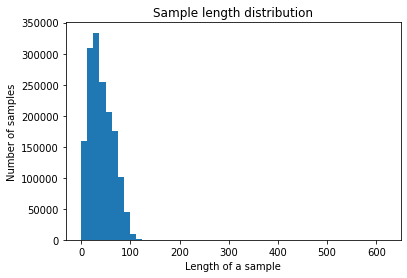

In [ ]:
plot_sample_length_distribution(df['Cleaned_and_tokenized_tweet'])

In [ ]:
def get_num_words_per_sample(sample_texts):
    """Returns the median number of words per sample given corpus.

    # Arguments
        sample_texts: list, sample texts.

    # Returns
        int, median number of words per sample.
    """
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

In [ ]:
num_words_per_sample = get_num_words_per_sample(df['Cleaned_and_tokenized_tweet'])

AttributeError: 'float' object has no attribute 'split'

In [ ]:
for idx,s in enumerate(sample):
    print(idx,type(s))

0 <class 'str'>
1 <class 'str'>
2 <class 'str'>
3 <class 'str'>
4 <class 'str'>
5 <class 'str'>
6 <class 'str'>
7 <class 'str'>
8 <class 'str'>
9 <class 'str'>
10 <class 'str'>
11 <class 'str'>
12 <class 'str'>
13 <class 'str'>
14 <class 'str'>
15 <class 'str'>
16 <class 'str'>
17 <class 'float'>
18 <class 'str'>
19 <class 'str'>
20 <class 'str'>
21 <class 'str'>
22 <class 'str'>
23 <class 'str'>
24 <class 'str'>
25 <class 'str'>
26 <class 'str'>
27 <class 'str'>
28 <class 'str'>
29 <class 'str'>
30 <class 'str'>
31 <class 'str'>
32 <class 'str'>
33 <class 'str'>
34 <class 'str'>
35 <class 'str'>
36 <class 'str'>
37 <class 'str'>
38 <class 'str'>
39 <class 'str'>
40 <class 'str'>
41 <class 'str'>
42 <class 'str'>
43 <class 'str'>
44 <class 'str'>
45 <class 'str'>
46 <class 'str'>
47 <class 'str'>
48 <class 'str'>
49 <class 'str'>


While trying to get number of words per sample, I noticed that because of preprocessing, many texts have been reduced to length of zero and have been replaced by NaN value.This resulted in them getting the dtype of float that you can see in previous run. Lets remove these NaNs as they do not give any information about the sentiment.

In [ ]:
df[df['Cleaned_and_tokenized_tweet'].isna()]

,Sentiment,tweet,Cleaned_tweet,Cleaned_and_tokenized_tweet
17,1,@VATD WHAT?,what?,NaN
135,1,@DJWiLLGATES,NaN,NaN
329,0,@AnnalieseDenton,NaN,NaN
532,0,@PeaceLoveAmy But why?,but why?,NaN
556,0,@AboveCommon ?????,?????,NaN
...,...,...,...,...
1598274,0,@heyheydoodle,NaN,NaN
1598723,0,@JenniRem What's up?,what's up?,NaN
1598977,1,@ABBSound ???? ?? ?????? ??????? http://tinyu...,???? ?? ?????? ??????? ?? ????? ???? ??? ?????...,NaN
1599491,1,@Wossybookclub im up for this,im up for this,NaN


In [ ]:
df = df[~df['Cleaned_and_tokenized_tweet'].isna()]

In [ ]:
len(df)

1592762

# Removing special characters from data.

As these are tweets, they contain a lot of special characters and slang language. Even after cleaning and tokenizing the texts these characters and slang language can be observed in the data. So lets try to remove these special characters.

In [ ]:
# abbreviation check list
abbreviations = {
        "$" : " dollar ",
        "€" : " euro ",
        "4ao" : "for adults only",
        "a.m" : "before midday",
        "a3" : "anytime anywhere anyplace",
        "aamof" : "as a matter of fact",
        "acct" : "account",
        "adih" : "another day in hell",
        "afaic" : "as far as i am concerned",
        "afaict" : "as far as i can tell",
        "afaik" : "as far as i know",
        "afair" : "as far as i remember",
        "afk" : "away from keyboard",
        "app" : "application",
        "approx" : "approximately",
        "apps" : "applications",
        "asap" : "as soon as possible",
        "asl" : "age, sex, location",
        "atk" : "at the keyboard",
        "ave." : "avenue",
        "aymm" : "are you my mother",
        "ayor" : "at your own risk", 
        "b&b" : "bed and breakfast",
        "b+b" : "bed and breakfast",
        "b.c" : "before christ",
        "b2b" : "business to business",
        "b2c" : "business to customer",
        "b4" : "before",
        "b4n" : "bye for now",
        "b@u" : "back at you",
        "bae" : "before anyone else",
        "bak" : "back at keyboard",
        "bbbg" : "bye bye be good",
        "bbc" : "british broadcasting corporation",
        "bbias" : "be back in a second",
        "bbl" : "be back later",
        "bbs" : "be back soon",
        "be4" : "before",
        "bfn" : "bye for now",
        "blvd" : "boulevard",
        "bout" : "about",
        "brb" : "be right back",
        "bros" : "brothers",
        "brt" : "be right there",
        "bsaaw" : "big smile and a wink",
        "btw" : "by the way",
        "bwl" : "bursting with laughter",
        "c/o" : "care of",
        "cet" : "central european time",
        "cf" : "compare",
        "cia" : "central intelligence agency",
        "csl" : "can not stop laughing",
        "cu" : "see you",
        "cul8r" : "see you later",
        "cv" : "curriculum vitae",
        "cwot" : "complete waste of time",
        "cya" : "see you",
        "cyt" : "see you tomorrow",
        "dae" : "does anyone else",
        "dbmib" : "do not bother me i am busy",
        "diy" : "do it yourself",
        "dm" : "direct message",
        "dwh" : "during work hours",
        "e123" : "easy as one two three",
        "eet" : "eastern european time",
        "eg" : "example",
        "embm" : "early morning business meeting",
        "encl" : "enclosed",
        "encl." : "enclosed",
        "etc" : "and so on",
        "faq" : "frequently asked questions",
        "fawc" : "for anyone who cares",
        "fb" : "facebook",
        "fc" : "fingers crossed",
        "fig" : "figure",
        "fimh" : "forever in my heart", 
        "ft." : "feet",
        "ft" : "featuring",
        "ftl" : "for the loss",
        "ftw" : "for the win",
        "fwiw" : "for what it is worth",
        "fyi" : "for your information",
        "g9" : "genius",
        "gahoy" : "get a hold of yourself",
        "gal" : "get a life",
        "gcse" : "general certificate of secondary education",
        "gfn" : "gone for now",
        "gg" : "good game",
        "gl" : "good luck",
        "glhf" : "good luck have fun",
        "gmt" : "greenwich mean time",
        "gmta" : "great minds think alike",
        "gn" : "good night",
        "g.o.a.t" : "greatest of all time",
        "goat" : "greatest of all time",
        "goi" : "get over it",
        "gps" : "global positioning system",
        "gr8" : "great",
        "gratz" : "congratulations",
        "gyal" : "girl",
        "h&c" : "hot and cold",
        "hp" : "horsepower",
        "hr" : "hour",
        "hrh" : "his royal highness",
        "ht" : "height",
        "ibrb" : "i will be right back",
        "ic" : "i see",
        "icq" : "i seek you",
        "icymi" : "in case you missed it",
        "idc" : "i do not care",
        "idgadf" : "i do not give a damn fuck",
        "idgaf" : "i do not give a fuck",
        "idk" : "i do not know",
        "ie" : "that is",
        "i.e" : "that is",
        "ifyp" : "i feel your pain",
        "ig" : "instagram",
        "iirc" : "if i remember correctly",
        "ilu" : "i love you",
        "ily" : "i love you",
        "imho" : "in my humble opinion",
        "imo" : "in my opinion",
        "imu" : "i miss you",
        "iow" : "in other words",
        "irl" : "in real life",
        "j4f" : "just for fun",
        "jic" : "just in case",
        "jk" : "just kidding",
        "jsyk" : "just so you know",
        "l8r" : "later",
        "lb" : "pound",
        "lbs" : "pounds",
        "ldr" : "long distance relationship",
        "lmao" : "laugh my ass off",
        "lmfao" : "laugh my fucking ass off",
        "lol" : "laughing out loud",
        "ltd" : "limited",
        "ltns" : "long time no see",
        "m8" : "mate",
        "mf" : "motherfucker",
        "mfs" : "motherfuckers",
        "mfw" : "my face when",
        "mofo" : "motherfucker",
        "mph" : "miles per hour",
        "mr" : "mister",
        "mrw" : "my reaction when",
        "ms" : "miss",
        "mte" : "my thoughts exactly",
        "nagi" : "not a good idea",
        "nbc" : "national broadcasting company",
        "nbd" : "not big deal",
        "nfs" : "not for sale",
        "ngl" : "not going to lie",
        "nhs" : "national health service",
        "nrn" : "no reply necessary",
        "nsfl" : "not safe for life",
        "nsfw" : "not safe for work",
        "nth" : "nice to have",
        "nvr" : "never",
        "nyc" : "new york city",
        "oc" : "original content",
        "og" : "original",
        "ohp" : "overhead projector",
        "oic" : "oh i see",
        "omdb" : "over my dead body",
        "omg" : "oh my god",
        "omw" : "on my way",
        "p.a" : "per annum",
        "p.m" : "after midday",
        "pm" : "prime minister",
        "poc" : "people of color",
        "pov" : "point of view",
        "pp" : "pages",
        "ppl" : "people",
        "prw" : "parents are watching",
        "ps" : "postscript",
        "pt" : "point",
        "ptb" : "please text back",
        "pto" : "please turn over",
        "qpsa" : "what happens", 
        "ratchet" : "rude",
        "rbtl" : "read between the lines",
        "rlrt" : "real life retweet", 
        "rofl" : "rolling on the floor laughing",
        "roflol" : "rolling on the floor laughing out loud",
        "rotflmao" : "rolling on the floor laughing my ass off",
        "rt" : "retweet",
        "ruok" : "are you ok",
        "sfw" : "safe for work",
        "sk8" : "skate",
        "smh" : "shake my head",
        "sq" : "square",
        "srsly" : "seriously", 
        "ssdd" : "same stuff different day",
        "tbh" : "to be honest",
        "tbs" : "tablespooful",
        "tbsp" : "tablespooful",
        "tfw" : "that feeling when",
        "thks" : "thank you",
        "tho" : "though",
        "thx" : "thank you",
        "tia" : "thanks in advance",
        "til" : "today i learned",
        "tl;dr" : "too long i did not read",
        "tldr" : "too long i did not read",
        "tmb" : "tweet me back",
        "tntl" : "trying not to laugh",
        "ttyl" : "talk to you later",
        "u" : "you",
        "u2" : "you too",
        "u4e" : "yours for ever",
        "utc" : "coordinated universal time",
        "w/" : "with",
        "w/o" : "without",
        "w8" : "wait",
        "wassup" : "what is up",
        "wb" : "welcome back",
        "wtf" : "what the fuck",
        "wtg" : "way to go",
        "wtpa" : "where the party at",
        "wuf" : "where are you from",
        "wuzup" : "what is up",
        "wywh" : "wish you were here",
        "yd" : "yard",
        "ygtr" : "you got that right",
        "ynk" : "you never know",
        "zzz" : "sleeping bored and tired"
}

In [ ]:
%%time
import re

def remove_special_chars(text):
    # func to remove special chars
    text = re.sub(r"\x89Û_", "", text)
    text = re.sub(r"\x89ÛÒ", "", text)
    text = re.sub(r"\x89ÛÓ", "", text)
    text = re.sub(r"\x89ÛÏ", "", text)
    text = re.sub(r"\x89Û÷", "", text)
    text = re.sub(r"\x89Ûª", "", text)
    text = re.sub(r"\x89Û\x9d", "", text)
    text = re.sub(r"å_", "", text)
    text = re.sub(r"\x89Û¢", "", text)
    text = re.sub(r"\x89Û¢åÊ", "", text)
    text = re.sub(r"åÊ", "", text)
    text = re.sub(r"åÈ", "", text)
    text = re.sub(r"Ì©", "e", text)
    text = re.sub(r"å¨", "", text)
    text = re.sub(r"åÇ", "", text)
    text = re.sub(r"åÀ", "", text)
    text = re.sub(r"let\x89Ûªs", "let us", text)
    text = re.sub(r"that\x89Ûªs", "that is", text)
    text = re.sub(r"can\x89Ûªt", "cannot", text)
    text = re.sub(r"donå«t", "do not", text)  
    text = re.sub(r"don\x89Ûªt", "do not", text)
    text = re.sub(r"it\x89Ûªs", "it is", text)
    text = re.sub(r"you're", "you are", text)
    text = re.sub(r"you\x89Ûªre", "you are", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"i\x89Ûªm", "i am", text)
    text = re.sub(r"wouldn\x89Ûªt", "would not", text)
    text = re.sub(r"here's", "here is", text)
    text = re.sub(r"here\x89Ûªs", "here is", text)
    text = re.sub(r"you\x89Ûªve", "you have", text)
    text = re.sub(r"doesn\x89Ûªt", "does not", text)
    text = re.sub(r"who's", "who is", text)
    text = re.sub(r"i've", "i have", text)
    text = re.sub(r"i\x89Ûªve", "i have", text)
    text = re.sub(r"y'all", "you all", text)
    text = re.sub(r"would've", "would have", text)
    text = re.sub(r"it'll", "it will", text)
    text = re.sub(r"we'll", "we will", text)
    text = re.sub(r"he'll", "he will", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"they'll", "they will", text)
    text = re.sub(r"they'd", "they would", text)
    text = re.sub(r"they've", "they have", text)
    text = re.sub(r"i'd", "i would", text)
    text = re.sub(r"I\x89Ûªd", "I would", text)
    text = re.sub(r"should've", "should have", text)
    text = re.sub(r"we'd", "we would", text)
    text = re.sub(r"i'll", "i will", text)
    text = re.sub(r"^ill$", "i will", text)
    text = re.sub(r"you'll", "you will", text)
    text = re.sub(r"you\x89Ûªll", "you will", text)    
    text = re.sub(r"ain't", "am not", text)    
    text = re.sub(r"you'd", "you would", text)
    text = re.sub(r"could've", "could have", text)
    text = re.sub(r"mÌ¼sica", "music", text)
    text = re.sub(r"some1", "someone", text)
    text = re.sub(r"yrs", "years", text)
    text = re.sub(r"hrs", "hours", text)
    text = re.sub(r"2morow|2moro", "tomorrow", text)
    text = re.sub(r"2day", "today", text)
    text = re.sub(r"4got|4gotten", "forget", text)
    text = re.sub(r"b-day|bday", "b-day", text)
    text = re.sub(r"mother's", "mother", text)
    text = re.sub(r"mom's", "mom", text)
    text = re.sub(r"dad's", "dad", text)
    text = re.sub(r"^[h|a]+$", "haha", text)
    text = re.sub(r"lmao|lolz|rofl", "lol", text)
    text = re.sub(r"thanx|thnx|thx", "thanks", text)
    text = re.sub(r'all[l]+', "all", text)
    text = re.sub(r'so[o]+', "so", text)
    text = re.sub(r'a[w]+', "awww", text)
    text = re.sub(r'why[y]+', "why", text)
    text = re.sub(r'way[y]+', "way", text)
    text = re.sub(r'will[l]+', "will", text)
    text = re.sub(r'oo[o]+h', "ooh", text)
    text = re.sub(r'hey[y]+', "hey", text)
    text = re.sub(r"boo[o]+m", "boom", text)
    text = re.sub(r"co[o]+ld", "cold", text)
    text = re.sub(r"goo[o]+d", "good", text)
    text = re.sub(r"luckigrrl", "lucky girl", text)
    text = re.sub(r"evolvin", "evolving", text)
    
    words = text.split()
    text = ' '.join([abbreviations[word] if word in abbreviations.keys() else word for word in words])
    return text


df['Cleaned_and_tokenized_tweet_removing_special_chars'] = df['Cleaned_and_tokenized_tweet'].apply(remove_special_chars)


CPU times: user 2min 20s, sys: 276 ms, total: 2min 20s
Wall time: 2min 21s


In [ ]:
df.rename(columns={'Cleaned_and_tokenized_tweet_removing_special_chars':'Cleaned_data'},inplace=True)

# Choosing a Model

Now that we are done with data processing, lets proceed to model this data.This means asking questions such as, “How do we present the text data to an algorithm that expects numeric input?”, “What type of model should we use?”, “What configuration parameters should we use for our model?”, etc.

I am using the model selection algorithm that I found at : https://developers.google.com/machine-learning/guides/text-classification/step-2-5

1. Calculate the number of samples/number of words per sample ratio.
2. If this ratio is less than 1500, tokenize the text as n-grams and use a
simple multi-layer perceptron (MLP) model to classify them (left branch in the
flowchart below):
  a. Split the samples into word n-grams; convert the n-grams into vectors.
  b. Score the importance of the vectors and then select the top 20K using the scores.
  c. Build an MLP model.
3. If the ratio is greater than 1500, tokenize the text as sequences and use a
   sepCNN model to classify them (right branch in the flowchart below):
  a. Split the samples into words; select the top 20K words based on their frequency.
  b. Convert the samples into word sequence vectors.
  c. If the original number of samples/number of words per sample ratio is less
     than 15K, using a fine-tuned pre-trained embedding with the sepCNN
     model will likely provide the best results.
4. Measure the model performance with different hyperparameter values to find
   the best model configuration for the dataset.

In [ ]:
num_words_per_sample = get_num_words_per_sample(df['Cleaned_data'])

In [ ]:
num_words_per_sample

7.0

In [ ]:
ratio = len(df) // num_words_per_sample

In [ ]:
ratio

227537.0

Calculate the number of samples/number of words per sample ratio: 227537.0

This ratio is significantly greater than 1500 and so we will have to go with step 3 of this algorithm.

Lets tokenize the text as sequences and create a word embedding matrix.But before that we need to split our data into training and testing.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['Cleaned_data'],df['Sentiment'],test_size=0.2,random_state=42,stratify=df['Sentiment'])

In [ ]:
import tensorflow as tf

def create_text_sequences(train_texts,val_texts,max_sequence_length=50,top_k_features=None):

  #Tokenize top k words.
  tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k_features)
  tokenizer.fit_on_texts(train_texts)

  # Vectorize training and validation texts.
  x_train = tokenizer.texts_to_sequences(train_texts)
  x_val = tokenizer.texts_to_sequences(val_texts)

  #Pad sequences to make all of them of same length
  x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_sequence_length)
  x_val = tf.keras.preprocessing.sequence.pad_sequences(x_val, maxlen=max_sequence_length)
  
  return x_train, x_val, tokenizer.word_index

In [ ]:
def label_encode_target(y_train,y_test):
  '''Function to encode the target variable using label encoding.'''
  
  from sklearn.preprocessing import LabelEncoder

  encoder = LabelEncoder()
  encoder.fit(y_train.tolist())

  ytrain = encoder.transform(y_train.tolist())
  ytest = encoder.transform(y_test.tolist())

  ytrain = ytrain.reshape(-1,1)
  ytest = ytest.reshape(-1,1)

  return ytrain,ytest


In [ ]:
xtrain,xtest,word_index = create_text_sequences(X_train.tolist(),X_test.tolist(),top_k_features=20000)

In [ ]:
ytrain,ytest = label_encode_target(y_train,y_test)

In [ ]:
def create_embedding_matrix(word_index):
  '''Function to create word embeddings using spacy.
   Input: A dictionary with word as key and index as value.'''

   #embedding matrix of size (vocab_size,300)
  embedding_matrix = np.zeros((len(word_index) + 1,300))
  #embedding_matrix = [0]*(len(word_index) + 1)
  for word,index in word_index.items():
    embedding_matrix[index] = nlp(word).vector

  return embedding_matrix

In [ ]:
%%time
embedding_matrix = create_embedding_matrix(tokenizer.word_index)

CPU times: user 36min 54s, sys: 6.84 s, total: 37min 1s
Wall time: 36min 59s


In [ ]:
embedding_matrix.shape

(274478, 300)

In [ ]:
vocab_size = embedding_matrix.shape[0]
embed_dim = embedding_matrix.shape[1]


embedding = tf.keras.layers.Embedding(vocab_size,embed_dim,trainable=False)
embedding.build(input_shape=(1,))
embedding.set_weights([embedding_matrix])

In [ ]:
dropout = tf.keras.layers.Dropout(0.5)

In [ ]:
bd1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True))

In [ ]:
bd2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))

In [ ]:
output = tf.keras.layers.Dense(1,activation="sigmoid") 

In [ ]:
model = tf.keras.Sequential()

In [ ]:
# Model 1 - Bi-LSTM with WOrd2Vec embeddings

model.add(embedding)
model.add(dropout)
model.add(bd1)
model.add(bd2)
model.add(output)


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         82343400  
                                                                 
 dropout (Dropout)           (None, None, 300)         0         
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        186880    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 82,629,225
Trainable params: 285,825
Non-t

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [ ]:
BATCH_SIZE = 1024
EPOCHS = 10
KERAS_MODEL = "LSTM_model.h5"

In [ ]:
%%time
history = model.fit(xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data = (xtest,ytest),
                    callbacks=callbacks)

Epoch 1/10
1089/1089 [==============================] - 2825s 3s/step - loss: 0.5183 - accuracy: 0.7397 - val_loss: 0.4736 - val_accuracy: 0.7714 - lr: 0.0010
Epoch 2/10
1089/1089 [==============================] - 2763s 3s/step - loss: 0.4853 - accuracy: 0.7633 - val_loss: 0.4619 - val_accuracy: 0.7791 - lr: 0.0010
Epoch 3/10
1089/1089 [==============================] - 2771s 3s/step - loss: 0.4742 - accuracy: 0.7708 - val_loss: 0.4563 - val_accuracy: 0.7823 - lr: 0.0010
Epoch 4/10
1089/1089 [==============================] - 2771s 3s/step - loss: 0.4671 - accuracy: 0.7751 - val_loss: 0.4527 - val_accuracy: 0.7853 - lr: 0.0010
Epoch 5/10
1089/1089 [==============================] - 2740s 3s/step - loss: 0.4622 - accuracy: 0.7784 - val_loss: 0.4481 - val_accuracy: 0.7879 - lr: 0.0010
Epoch 6/10
1089/1089 [==============================] - 2754s 3s/step - loss: 0.4582 - accuracy: 0.7810 - val_loss: 0.4461 - val_accuracy: 0.7894 - lr: 0.0010
Epoch 7/10
1089/1089 [========================

In [ ]:
model.save("/content/drive/MyDrive/data/LSTM-V1")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data/LSTM-V1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/data/LSTM-V1/assets


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/data/LSTM-V1')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         82343400  
                                                                 
 dropout (Dropout)           (None, None, 300)         0         
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        186880    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 82,629,225
Trainable params: 285,825
Non-t

In [ ]:
%%time
score = model.evaluate(xtest, ytest, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

467/467 [==============================] - 407s 870ms/step - loss: 0.4411 - accuracy: 0.7927

ACCURACY: 0.792660117149353
LOSS: 0.44107794761657715
CPU times: user 12min 6s, sys: 43.6 s, total: 12min 49s
Wall time: 7min 22s


In [ ]:
%%time
score = new_model.evaluate(xtest, ytest, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

467/467 [==============================] - 402s 854ms/step - loss: 0.4411 - accuracy: 0.7927

ACCURACY: 0.792660117149353
LOSS: 0.44107794761657715
CPU times: user 12min 4s, sys: 43.7 s, total: 12min 48s
Wall time: 6min 42s


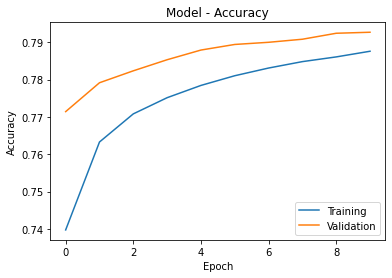

In [ ]:
fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

So with this model we got an accuracy of 79.27% after 10 epochs. It took a lot of time for training(around 7 hours) and still could not perform well on test set. From the graph we can see that there is no sign of overfitting, but we can definitely improve on accuracy.To begin with, we can try changing the pre-trained embeddings from Word2Vec to something specifically trained on twitter like texts. Lets change the embeddings to glove-twitter-200.

In [ ]:
import gensim.downloader

glove_vectors = gensim.downloader.load('glove-twitter-200')

[==================================================] 100.0% 758.5/758.5MB downloaded


In [ ]:
glove_vectors['happy']

array([-1.2304 ,  0.48312,  0.14102, -0.0295 , -0.65253, -0.18554,
        2.1033 ,  1.7516 , -1.3001 , -0.32113, -0.84774,  0.41995,
       -3.8823 ,  0.19638, -0.72865, -0.85273,  0.23174, -1.0763 ,
       -0.83023,  0.10815, -0.51015,  0.27691, -1.1895 ,  0.98094,
       -0.13955], dtype=float32)

In [ ]:

embedding_matrix = np.zeros((len(word_index) + 1,200))
num_words_in_embedding = 0
word_not_found = set()

#embedding_matrix = [0]*(len(word_index) + 1)
for word,index in word_index.items():
  if word in glove_vectors:
    num_words_in_embedding+=1
    embedding_matrix[index] = glove_vectors[word]
  else:
    word_not_found.add(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (238326, 200)


In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [ ]:
BATCH_SIZE = 1024
EPOCHS = 11

In [ ]:
cnn_model = tf.keras.models.Sequential()

In [ ]:
embedding_layer = tf.keras.layers.Embedding(embedding_matrix.shape[0],
                                embedding_matrix.shape[1],
                                weights=[embedding_matrix],
                                trainable=False)

Now lets go ahead and build the sepCNN model that was mentioned in the google developer guide.

In [ ]:
# Model 2 - sepCNN model.


filters = 64
kernel_size = 3
pool_size = 3

cnn_model.add(embedding_layer)

cnn_model.add(tf.keras.layers.Dropout(rate=0.3))
cnn_model.add(tf.keras.layers.SeparableConv1D(filters=filters,
                          kernel_size=kernel_size,
                          activation='relu',
                          bias_initializer='random_uniform',
                          depthwise_initializer='random_uniform',
                          padding='same'))
cnn_model.add(tf.keras.layers.SeparableConv1D(filters=filters,
                          kernel_size=kernel_size,
                          activation='relu',
                          bias_initializer='random_uniform',
                          depthwise_initializer='random_uniform',
                          padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling1D(pool_size=pool_size))

cnn_model.add(tf.keras.layers.SeparableConv1D(filters=filters * 2,
                      kernel_size=kernel_size,
                      activation='relu',
                      bias_initializer='random_uniform',
                      depthwise_initializer='random_uniform',
                      padding='same'))
cnn_model.add(tf.keras.layers.SeparableConv1D(filters=filters * 2,
                      kernel_size=kernel_size,
                      activation='relu',
                      bias_initializer='random_uniform',
                      depthwise_initializer='random_uniform',
                      padding='same'))
cnn_model.add(tf.keras.layers.GlobalAveragePooling1D())
cnn_model.add(tf.keras.layers.Dropout(rate=0.3))
cnn_model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         47665200  
                                                                 
 dropout (Dropout)           (None, None, 200)         0         
                                                                 
 separable_conv1d (Separable  (None, None, 64)         13464     
 Conv1D)                                                         
                                                                 
 separable_conv1d_1 (Separab  (None, None, 64)         4352      
 leConv1D)                                                       
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                        

In [ ]:
cnn_model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [ ]:
BATCH_SIZE = 1024
EPOCHS = 75

In [ ]:
%%time
history = cnn_model.fit(xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split = 0.1,
                    callbacks=callbacks)

Epoch 1/75
1120/1120 [==============================] - 444s 395ms/step - loss: 0.6932 - accuracy: 0.5011 - val_loss: 0.6932 - val_accuracy: 0.4999 - lr: 0.0010
Epoch 2/75
1120/1120 [==============================] - 436s 390ms/step - loss: 0.5775 - accuracy: 0.6680 - val_loss: 0.4930 - val_accuracy: 0.7591 - lr: 0.0010
Epoch 3/75
1120/1120 [==============================] - 436s 390ms/step - loss: 0.4997 - accuracy: 0.7557 - val_loss: 0.4821 - val_accuracy: 0.7662 - lr: 0.0010
Epoch 4/75
1120/1120 [==============================] - 436s 390ms/step - loss: 0.4905 - accuracy: 0.7622 - val_loss: 0.4781 - val_accuracy: 0.7696 - lr: 0.0010
Epoch 5/75
1120/1120 [==============================] - 437s 390ms/step - loss: 0.4851 - accuracy: 0.7651 - val_loss: 0.4719 - val_accuracy: 0.7736 - lr: 0.0010
Epoch 6/75
1120/1120 [==============================] - 437s 390ms/step - loss: 0.4811 - accuracy: 0.7676 - val_loss: 0.4721 - val_accuracy: 0.7733 - lr: 0.0010
Epoch 7/75
1120/1120 [============

In [ ]:
%%time
score = cnn_model.evaluate(xtest, ytest, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

312/312 [==============================] - 32s 103ms/step - loss: 0.4567 - accuracy: 0.7823

ACCURACY: 0.782256007194519
LOSS: 0.4566788077354431
CPU times: user 37.1 s, sys: 1.31 s, total: 38.4 s
Wall time: 32.1 s


The sepCNN model was faster in the training process as compared to Bi-LSTM model and therefore I increased the number of epochs to 75.But the training stopped prematurely as there was no improvement in validation accuracy. We got an accuracy of 78.22% after training of 37 epochs. Lets go ahead and try BERT like models in order to improve the accuracy. As BERT models are computationally expensive and time consuming, we will train this model on a subset of data(10% of the original data.)

In [ ]:
from sklearn.model_selection import train_test_split

sample_size = int(len(df)*0.05)
sampleDf = df.sample(sample_size, random_state=23)
x = sampleDf['Cleaned_data'].values
y = sampleDf['Sentiment'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

In [ ]:
y_train,y_test = label_encode_target(y_train,y_test)

## Tokenization using BERT Tokenizer

In [ ]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
import tensorflow as tf

In [ ]:
from official.nlp import optimization

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
bert_classifier_model = build_classifier_model()

In [ ]:
bert_classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [ ]:
bert_classifier_model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics='accuracy')

In [ ]:
EPOCHS = 5
BATCH_SIZE = 32

In [ ]:
import official.nlp.bert.bert_models
import official.nlp.bert.configs
import official.nlp.bert.run_classifier
import official.nlp.bert.tokenization as tokenization

from official.modeling import tf_utils
from official import nlp
from official.nlp import bert

ModuleNotFoundError: ignored

In [ ]:
import official.nlp.bert.tokenization as tokenization

In [ ]:
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/2",
                            trainable=True)

In [ ]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
tokenizer.convert_tokens_to_ids(['[CLS]', '[SEP]'])

[101, 102]

In [ ]:
tokenizer.convert_tokens_to_ids(['[CLS]', '[SEP]'])

[101, 102]

In [ ]:
def encode_names(n):
   tokens = ['[CLS]'] #Start token
   tokens.extend(tokenizer.tokenize(n))
   tokens.append('[SEP]')  # seperation (EOS) token
   return tokenizer.convert_tokens_to_ids(tokens)

tweets = tf.ragged.constant([
    encode_names(n) for n in x_train])

In [ ]:
input_word_ids = tweets

In [ ]:
lens = [len(i) for i in input_word_ids]
max_seq_length = max(lens)
print('Max length is:', max_seq_length)

Max length is: 324


In [ ]:
max_seq_length = int(1.5*max_seq_length)
print('Max length is:', max_seq_length)

Max length is: 486


In [ ]:
input_mask = tf.ones_like(input_word_ids).to_tensor(shape=(None, max_seq_length))

In [ ]:
cls = [tokenizer.convert_tokens_to_ids(['[CLS]'])]*input_word_ids.shape[0]

type_cls = tf.zeros_like(cls)
type_tokens = tf.ones_like(input_word_ids)
input_type_ids = tf.concat(
    [type_cls, type_tokens], axis=-1).to_tensor(shape=(None, max_seq_length))

input_type_ids

<tf.Tensor: shape=(127420, 486), dtype=int32, numpy=
array([[0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]], dtype=int32)>

In [ ]:
def bert_encode(string_list,max_seq_length):
  num_examples = len(string_list)
  
  string_tokens = tf.ragged.constant([
      encode_names(n) for n in np.array(string_list)])

  cls = [tokenizer.convert_tokens_to_ids(['[CLS]'])]*string_tokens.shape[0]
  input_word_ids = tf.concat([cls, string_tokens], axis=-1)

  input_mask = tf.ones_like(input_word_ids).to_tensor(shape=(None, max_seq_length))

  type_cls = tf.zeros_like(cls)
  type_tokens = tf.ones_like(string_tokens)
  input_type_ids = tf.concat(
      [type_cls, type_tokens], axis=-1).to_tensor(shape=(None, max_seq_length))

  inputs = {
      'input_word_ids': input_word_ids.to_tensor(shape=(None, max_seq_length)),
      'input_mask': input_mask,
      'input_type_ids': input_type_ids}

  return inputs

In [ ]:
X_train = bert_encode(x_train,max_seq_length)

In [ ]:
X_test = bert_encode(x_test,max_seq_length)

In [ ]:
#num_class = len(encoder.classes_)  # Based on available class selection
#max_seq_length = max_seq_length  # we calculated this a couple cells ago

input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="segment_ids")

pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])                                  

output = tf.keras.layers.Dropout(rate=0.1)(pooled_output)

output = tf.keras.layers.Dense(1, activation='softmax', name='output')(output)

model = tf.keras.Model(
    inputs={
        'input_word_ids': input_word_ids,
        'input_mask': input_mask,
        'input_type_ids': segment_ids
        },
        outputs=output)

In [ ]:
from keras.utils import np_utils
from official import nlp
import official.nlp.optimization

epochs = 3
batch_size = 16  # select based on your GPU resources
eval_batch_size = batch_size

dummy_y_test = np_utils.to_categorical(y_test)
dummy_y_train = np_utils.to_categorical(y_train)

train_data_size = len(dummy_y_train)
steps_per_epoch = int(train_data_size / batch_size)
num_train_steps = steps_per_epoch * epochs
warmup_steps = int(epochs * train_data_size * 0.1 / batch_size)

optimizer = nlp.optimization.create_optimizer(
    2e-5, num_train_steps=num_train_steps, num_warmup_steps=warmup_steps)

In [ ]:
optimizer

In [ ]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 486)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 486)]        0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 486)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        177853441   ['input_word_ids[0][0]',         
                                 (None, 486, 768)]                'input_mask[0][0]',         

In [ ]:
%%time

history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/3


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.7749071583064671


In [ ]:
%%time

lr= LogisticRegression(max_iter=1000,C=1.0, penalty='l1', solver= 'liblinear')

rf=RandomForestClassifier(max_features='sqrt', n_estimators=100)

ad=AdaBoostClassifier()

vc=VotingClassifier(estimators=[('lr',lr),('rf',rf),('ad',ad)],voting='soft',weights=[1,1.5,1.3])
vc.fit(X_train,y_train)
pred=vc.predict(X_test)

print('file saved!')
print('accuracy: %s' % accuracy_score(pred, y_test))
print(classification_report(y_test,pred))
print('\t\t\t\t\t\t\nConfusion Matrix:\t\t')
print(confusion_matrix(y_test,pred))